# Naive Bayes Text Classification
based on: https://www.youtube.com/watch?v=l3dZ6ZNFjo0

In [1]:
# Loading the necessary libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [3]:
# get newgroups dataset from sklearn
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [15]:
# Defining the categories
categories = data.target_names

# Defining the training data
train = fetch_20newsgroups(subset='train', categories=categories)

# Defining the testing data
test = fetch_20newsgroups(subset='test', categories=categories)

In [19]:
# print example from training data
print(train.data[4])

From: jcm@head-cfa.harvard.edu (Jonathan McDowell)
Subject: Re: Shuttle Launch Question
Organization: Smithsonian Astrophysical Observatory, Cambridge, MA,  USA
Distribution: sci
Lines: 23

From article <C5owCB.n3p@world.std.com>, by tombaker@world.std.com (Tom A Baker):
>>In article <C5JLwx.4H9.1@cs.cmu.edu>, ETRAT@ttacs1.ttu.edu (Pack Rat) writes...
>>>"Clear caution & warning memory.  Verify no unexpected
>>>errors. ...".  I am wondering what an "expected error" might
>>>be.  Sorry if this is a really dumb question, but
> 
> Parity errors in memory or previously known conditions that were waivered.
>    "Yes that is an error, but we already knew about it"
> I'd be curious as to what the real meaning of the quote is.
> 
> tom


My understanding is that the 'expected errors' are basically
known bugs in the warning system software - things are checked
that don't have the right values in yet because they aren't
set till after launch, and suchlike. Rather than fix the code
and possibly i

In [22]:
# show length of train and test data
print(len(train.data), len(test.data))

11314 7532


In [26]:
# Importing packages for text classification
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

# Creating a model pipeline based on Multinomial Naive Bayes
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [28]:
# Train the model with the training data
model.fit(train.data, train.target)

Pipeline(memory=None,
     steps=[('tfidfvectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth...   vocabulary=None)), ('multinomialnb', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [33]:
# Create labels for the testing data
#labels = model.predict(test.data)
labels = model.predict(test.data)
labels

array([ 7, 11,  0, ...,  9,  3, 15], dtype=int64)

(20, 20)


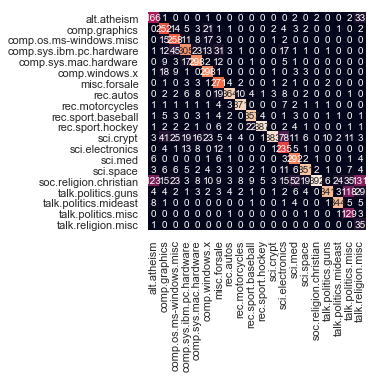

In [53]:
# Create confusion matrix and heatmap
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(test.target, labels)
print(mat.shape)

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
           xticklabels=train.target_names,
           yticklabels=train.target_names)

# Plotting heatmap of confusion matrix
plt.xlabel = ('true label')
plt.ylabel = ('predicted label')

In [54]:
# Predicting news category of new data based on trained model
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [55]:
predict_category('the new president of the United States')

'talk.politics.misc'

In [56]:
predict_category('has scored a goal in the last minute')

'rec.sport.hockey'

In [57]:
predict_category('was arrested')

'talk.politics.guns'

In [58]:
predict_category('next mission to Mars')

'sci.space'

In [62]:
predict_category('is the new Apple product')

'comp.sys.mac.hardware'